### **Section 1: Concepts explained in words** (Step 3)

**Definition**

Keywords: Volatility, Covariance, Correlation

**Volatility**

A statistical measure of the dispersion of returns for a certain protection or market index is volatility. In general, the risk increases with port turbulence. The standard deviation or variance of the two returns from a certain protection or market index is a typical approach to describe volatility.

While variance generally depicts the dispersion of returns around an asset's mean, volatility is a measure of that variance limited by a certain time period. Therefore, we have the option of reporting volatility on a daily, weekly, monthly, or annually basis. The annualized standard deviation can be thought of as a useful way to conceptualize volatility.

Beta coefficients, option pricing models, and return standard deviations are a few tools used to gauge volatility.

**Types of Volatility**

**Implied Volatility**

 Implied volatility is the assessment of potential price changes for a certain security by the market. Investors may estimate future movements, supply, and demand using implied volatility, which is also widely used to price option contracts.

**Historical Volatility**

A statistical indicator of the returns' variability for a specific security or market index over a specific time period is called historical volatility. In most cases, this metric is calculated by calculating the average departure from the price of a financial instrument over the specified time frame. The most typical method of calculating historical volatility is by using standard deviation, though it is not the only one. Generally speaking, a security is riskier the higher its historical volatility value. Given that risk can go either way—bullish or bearish—that outcome is not necessarily bad.
 

**Equations / Formulas**

Volatility is defined as the standard deviation of a series of random variables, each of which represents the return of the fund over some matching series of periods, for any fund that changes arbitrarily over time.

In finance, risk is interpreted as the standard deviation. The riskier an item or portfolio is, the higher its standard deviation should be. 


**daiy volatility**

- annualized volatility

$\sigma_{\mathrm{T}}=\sigma_{\text {annually }} \sqrt{T}$

where T expressed time horizon in years.

- daiy volatility

$\sigma_{\mathrm{P}}=\sigma_{\text {daily }} \sqrt{P}$

A common assumption is that P = 252 trading days in any given year.


**correlation**

statistical association between two random variables or bivariate data, whether causal or not, is referred to as correlation or dependency. Although "correlation" can mean any kind of link in the widest sense, in statistics it often refers to the strength of a pair of variables' linear relationships. 

In the financial and investing sectors, correlation is a computation that is used to determine how far two securities continue to move in relation to one another.

While a negative correlation indicates that the securities are going in opposite directions, a positive correlation indicates that they are moving in the same direction. A number between -1 and 1, with 0 denoting no association, is used to express this.

Because the risk reduction benefits of diversification depend on this statistic, investment managers, traders, and analysts place a high value on correlation calculations.

Correlation may be calculated using a variety of techniques. the approach used most frequently The Pearson product-moment correlation analyzes a pair of variables' linear connection. Any dataset with a finite covariance matrix is suitable for using it.

**Equations / Formulas**

$r=\frac{n \times\left(\sum(X, Y)-\left(\sum(X) \times \sum(Y)\right)\right)}{\sqrt{\left(n \times \sum\left(X^2\right)-\sum(X)^2\right) \times\left(n \times \sum\left(Y^2\right)-\sum(Y)^2\right)}}$

In regards to a diverse portfolio, correlation in investing is most significant. By purchasing non-correlated assets, investors can reduce their risk.

Since correlation measures returns changes and returns often exhibit little autocorrelation, correlation is inherently a short-run metric that is prone to instability over time.

**volatility impacts on correlation using bonds &, stocks**

Correlations between investment portfolio returns often increase during times of increased market volatility when compared to correlations estimated during periods of normal volatility. An increasing occurrence of the rising return correlation during periods of high volatility is connected with changes in the basic linkages that govern returns.

volatility affects correlations between asset returns even though the fundamental relationships between profits and losses remain constant; variations in implied volatility may be the only reason for differences in correlations observed over different time periods.





### **Section 2: Examples using real-world data** (Step 4 + 5)
In this examples, we use two asset classes which are Stock and ETF Bond.
We choose KO as a Stock and BND as an ETF.
BND tracks the Bloomberg Barclays U.S. Aggregate Float Adjusted Index.



In [ ]:
!pip install --upgrade pandas_datareader
# !pip show pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# daily price data in 6 months from 01/01/2012 - 30/06/2012
asset_class = ['STOCK', 'ETF']
stock = 'KO'
etf = 'BND'
tickers = {stock : 'STOCK', etf : 'ETF'}

start = datetime.date(2012, 1, 1)
end = datetime.date(2012, 6, 30)
prices = web.DataReader([stock, etf], "yahoo", start, end)["Adj Close"]
prices = prices.rename(columns=tickers)
prices.tail()

Symbols,STOCK,ETF
Date,,
2012-06-25,27.113762,64.642281
2012-06-26,27.226175,64.573349
2012-06-27,27.683090,64.642281
2012-06-28,27.766497,64.711281
2012-06-29,28.353960,64.665306


In [ ]:
# daily log returns
returns = np.log(prices) - np.log(prices.shift(1))
returns = returns.iloc[1:, 0:]
returns.tail()

Symbols,STOCK,ETF
Date,,
2012-06-25,-0.002271,0.002611
2012-06-26,0.004137,-0.001067
2012-06-27,0.016643,0.001067
2012-06-28,0.003008,0.001067
2012-06-29,0.020937,-0.000711


In [ ]:
# annual returns
((returns[asset_class].mean() + 1).pow(365) - 1) * 100

Symbols
STOCK    43.496951
ETF       7.847402
dtype: float64

Over the first 6 months of 2012, while both assets have positive annual return, Stock (NFLX) got a much higher return than ETF (BND). This is to be expected because a bond is considered safer assets than a stock, therefore its return should be lower than the stock's return.

#### **Comparing two assets**

**Volatility: daily return's standard deviation**

In [ ]:
returns.std()

Symbols
STOCK    0.007582
ETF      0.001637
dtype: float64

**Volatility: daily price's moving average volatility**

In [ ]:
((abs(prices - prices.rolling(50).mean())) / prices).mean()

Symbols
STOCK    0.033419
ETF      0.006594
dtype: float64

**Volatility: daily return percentage**

In [ ]:
100 * returns.mean()

Symbols
STOCK    0.098992
ETF      0.020700
dtype: float64

Both three volatility metrics show that the Stock (NFLX) has been more volatile over the six-month period than the ETF (BND). 

In fact, a higher risk means a higher potential for rewards. A lower standard deviation is not necessarily preferable when considering investments. It all depends on the investor’s risk preferences. 

Therefore, these volatility figures make sense compared to the annual return calculated above.

**Time series plot**

(-0.02, 0.02)

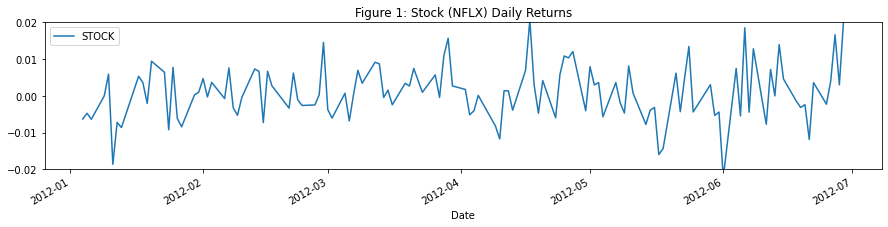

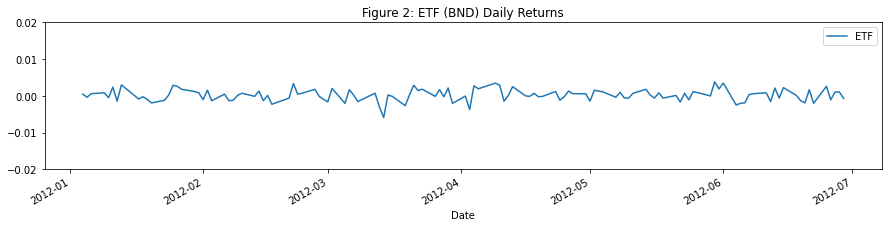

In [ ]:
ax1 = returns.plot(figsize=(15, 3), y="STOCK", title="Figure 1: Stock (NFLX) Daily Returns")
ax2 = returns.plot(figsize=(15, 3), y="ETF", title="Figure 2: ETF (BND) Daily Returns")
ax1.set_ylim(-0.02, 0.02)
ax2.set_ylim(-0.02, 0.02)

**Histogram of daily return distribution**

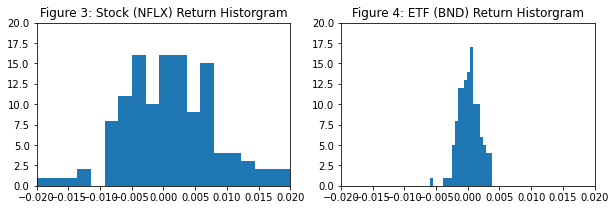

In [ ]:
num_rows, num_cols = 1, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3))

axes[0].hist(returns['STOCK'], bins = 20 )
axes[0].set(title="Figure 3: Stock (NFLX) Return Historgram")
axes[0].set_xlim(-0.02, 0.02)
axes[0].set_ylim(0 , 20)

axes[1].hist(returns['ETF'], bins = 20)
axes[1].set(title="Figure 4: ETF (BND) Return Historgram")
axes[1].set_xlim(-0.02, 0.02)
axes[1].set_ylim(0 , 20)

plt.show()

#### **The joint performance of the two assets**

**Covariance**

In [ ]:
returns.cov()

Symbols,STOCK,ETF
Symbols,,
STOCK,0.000057,-0.000003
ETF,-0.000003,0.000003


Looking at the covariance matrix above, we can see that these two assets have a slightly negative relationship with each other.

**Correlation**

In [ ]:
returns.corr()

Symbols,STOCK,ETF
Symbols,,
STOCK,1.000000,-0.277587
ETF,-0.277587,1.000000


The two assets have negative relationship but this relationship is weak since we have obtained a -0.27 Pearson's correlation coefficient.

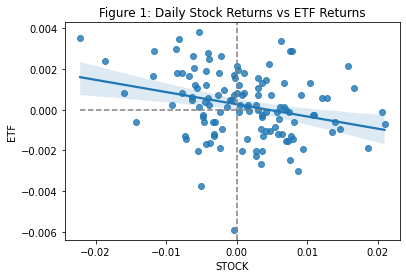

In [ ]:
chart = sns.regplot(x='STOCK', y='ETF', data=returns).set(
    title="Figure 1: Daily Stock Returns vs ETF Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(returns.STOCK), max(returns.ETF)], [0, 0], linestyle="--", color="grey")

### **Section 3: Examples using real-world applications** (Step 6)

 As was seen in the sections above, volatility and statistical related risk go hand by hand, though it may be hard to understand from the formal concept, mathematical expressions and plots. It becomes quite simple to understand once one considers real world examples.

 According to Vinte et al [1] "Volatility can be defined as how much the prices of a given instrument varies within a certain time interval". Of course one may only define variations of something with respect to something else a good practice is to measure it with respect the price of the asset a period of time before (for example 24h), this is further complicated by the fact that the dispersion of the price across a time frame gives multiple types of information, which can be perceived as [1]:

1 - Amplitude (Difference between the highest and lowest price) in the example of the ETF above that would be $\underbrace{85.22}_{Maximum \hspace{0.1cm} price}-\underbrace{62.40}_{Minimum \hspace{0.1cm} price} = \underbrace{22.82}_{Amplitude}$

2 - Deviation from a reference level (for example the average price on the range)

3 - The degree of interest that the instrument receives from the investors, when connected with the traded volume at a given price level

4 - The amplitude of the price changes, in connection with the frequency of changes;
frequent movement or slow directional changes following a certain trend, in terms of
going up or going down

Based on those many methods  for estimating volatily has been devised, the most common one is close to close which is usually presented in reports from financial journals or products [2]. However all those methods rely on the statistical standard deviation, what is difference about them is how the data is sampled or taken into consideration, and how one may use the standard deviation to calculate different volatility indicators, in [1] it is used to quantify entropy and it is then compared with several other volatility indicators such as Parkinson, Garman-Klass and Rogers-Satchell. The bechmark of indicators was computed on the SPY500,Down jones index .. etc and yielded inconclusive results, none is better than the other in the full time frame only on different days. So one should take into account several indicators of volatility.


Now let's talk about statistical related risk, which is quite related to volatility and in some sense may be seen as the cause for it. As a free market the prices of assets vary based on many factors such as supply and demand, speculation, rumors, news .. etc. Due to the price fluctuation (which is precisely volatility) one may loose (or even gain) money if pulling out an investment during a fluctuation. The practice of quantifying the chance of loosing money to fluctuations is often called risk management [3] and it aims to lower the statistical related risk. Of course not all price fluctuations are bad, while for volatility one wants to take into account both fluctuations towards lower prices and fluctuations towards higher prices as the same, when talking about statistical risk one only wants take into account the ones that affect you (those that make you loose money) so instead of the standard deviation things like the Sharpe ratio, VaR ,CVaR ... etc

Finally and just before going into real world examples, let us talk about correlation, though it sounds fairly general the usual measure that is pearson correlation only measures **linear** relashionships between variables, in finance from a practical point of view it means that a positive correlation (0 to 1) indicates that two assets are likely to move in the same direction (their prices are affected by similar factors) the higher the correaltion the more likely, a negative correlation indicates that they tend to move in opposite directions and 0 means there is no clear relatioship between them.

These 3 concepts are all intimately related and often whenever talking about one of them in real world cases the three of them are involved. For example according to Akshay Chinchalkar and Ishika Mookerjee [4] from bloomberg technology, due to the Ukranian-Russian war the correlations between Bonds and Oil have changed directions  

<img src='https://drive.google.com/uc?id=1azykMtHt8SCpTVC4QVC8jfqc_zjDUKqL'>

Image taken from [4], From the image we can see that the correlation should be computed quite often when dealing with real world applications since it may change drastically and flip signs in situations such as the current war, or the covif pandemic (2019 dip), this change of correlation affects risks significantly as the standard devation of a portfolio (for a two asset porfolio) is given by

$\sigma_{p}= \sqrt{(w_{1} \sigma_{1})^{2} +(w_{2} \sigma_{2})^{2}+ 2 w_{1} w_{2} \rho \sigma_{1} \sigma_{2}}$

Where $w_{i}$ refers to the weight of the asset on the portfolio, $\sigma_{i}$ is the standard deviation and $\rho$ is the correlation between the assets. If the correlation flips sign the volatility of our portfolio changes as well and we should adjust it to our desired risk. In this example the change in the standard deviation of the portfolio has to do with point 4 from our list. As oil is one of the basis for the energy industry people expect that rises may increase inflation [4] (which we now know is what happened) so they moved away from bonds as they expected inflation to be higher that the interests the bond pays, as a reaction the fed has been raising their bond yields [5] (what this means is that they pay bond holders more to increase their expected return so that their risk to inflation is lower), however the bond market is still on a downtrend [6], such as situation has made 2022 as specially volatile bear market [7] due to uncertainty of what securities should be considered safe or risky amid this year's economical crisis, starting in february with the war, the stock market crash and the cryptocurrency industry going from 3 trillion to 1 trillion dollars  


Article [7] is a reminder to seasoned investors that volatility, correlations, and risk are ever changing and one should be particularly careful in times of high volatility, since correlations change and it makes the market more risky for everyone, such volatile times often lead to financial crisis. 

When thinking about volatility and risk the hardest part is perhaps when to cut your investments and take a loss or profit. In [7] it is adviced that during volatile times (and always) you check your tolerance to risk and take steps to prevent going beyond it. It is also advised to diversify even more during such times since the higher the volatility the more unpredictable the market becomes [1]


Another contemporary example is [8]



 [1] https://www.mdpi.com/1099-4300/23/4/484

 [2] https://www.bloomberg.com/professional/blog/volatilitys-a-mean-reverting-asset-but-speed-level-are-unclear/

 [3] https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp 

 [4] https://www.bloomberg.com/news/articles/2022-03-02/cascade-of-russia-risks-stir-market-correlations-that-can-t-last?leadSource=uverify%20wall

 [5] https://finance.yahoo.com/news/treasuries-u-10-yields-rise-195456722.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAE2vuSrgp2s2iUKEne4vBM2vJnu4I6hGCvh23D5pIRkitbPh3Suf_Jc7JLq0bYdeLEBaO6CoOUWszXKRLoaCRSYFb1BSElg5bF99QE5wuzkdG0tublE0dxYHyfvJAw9z7GU4Ab8hgqlbwHZOpVNixAgxhgjfqUOB0255XRaYegl9

 [6] https://www.bloomberg.com/news/articles/2022-10-21/treasuries-tumble-into-longest-slump-since-1984-on-hawkish-fed

 [7] https://www.bloomberg.com/news/articles/2022-02-17/investing-ideas-how-to-protect-your-portfolio-from-a-volatile-market

 [8] https://www.bloomberg.com/news/articles/2022-10-22/bitcoin-s-btc-changing-correlations-may-mean-it-ll-be-a-haven-again-bofa-says?leadSource=uverify%20wall